In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
import import_ipynb
import common_functions
from sklearn.model_selection import cross_val_score, ShuffleSplit

importing Jupyter notebook from common_functions.ipynb


## Function(s) (unique to this task)

To refrain from having excessively long run-times, different values for the **'activation'** and **'solver'** hyperparameters were  tested while working on this task, and **'relu'** and **'adam'** were decided as the best suited values respectively. Therefore, the created model will be tested for different values of the **hidden_layer_sizes**, **alpha** and **learning_rate_init** hyperparameters respectively.

In [2]:
def train_evaluate_mlp(x_train, y_train, x_test, y_test, params, cv_params):
    '''
    Trains and evaluates an MLP classifier with the given training and test data. 
    The function also explores different combinations of hyperparamters and uses cross-validation
    to evaluate their performances and select the best performing one based on accuracy.
    
    Parameters:
        - x_train: 
        - x_test:
        - y_train: 
        - y_test: 
        - params: Dictionary containing a list of hyperparameters to be explored and evaluated
        - cv_params: Parameters used to initialize the ShuffleSplit object used for cross validation
        
    Returns:
        - best_params: The best performing parameters based on test set accuracy
    '''
    
    best_accuracy = 0
    best_parameters = {}
    
    # Loop through different hyperparameter values to find the ideal configuration
    for layers in params['hidden_layer_sizes']:
        for alpha in params['alphas']:
            for learning_rate in params['learning_rates']:
                # Logs the configuration being currently tested
                print('-'*30)
                print("Training and evaluating model using hidden_layer_size={}, alpha={}, "
                      "learning_rate_init={}".format(layers, alpha, learning_rate))
                
                # Initializes MLP model with passed hyperparameters
                mlp = MLPClassifier(hidden_layer_sizes=layers, activation='relu',
                                    solver='adam', alpha=alpha, learning_rate_init=learning_rate,
                                    max_iter=500, random_state=1, early_stopping=True)
                
                # Applies cross validation and computes scores
                cv = ShuffleSplit(**cv_params)
                cv_scores = cross_val_score(mlp, x_train, y_train, cv=cv, scoring='accuracy')
                cv_mean = cv_scores.mean()
                
                # Fits the model
                mlp.fit(x_train, y_train)
                
                # Generates predictions on the test and train dataset
                y_pred = mlp.predict(x_test)
                y_pred_train = mlp.predict(x_train)

                # Computes model evaluation metrics
                accuracy = accuracy_score(y_test, y_pred)
                training_accuracy = accuracy_score(y_train, y_pred_train)
                precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)
                
                # Displays current configuration and computed metrics
                print("CV Score:", round(cv_mean,4), "\nTraining Accuracy:", round(training_accuracy,4))
                print("Testing Accuracy:", round(accuracy,4), "\nF1-Score:", round(f1,4))
                print("Precision:", round(precision,4), "\nRecall:", round(recall,4))
                
                # Updates best params if current config outperforms the previous ones
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_parameters = {
                        'hidden_layer_sizes': layers,
                        'alpha': alpha,
                        'learning_rate_init': learning_rate
                    }
                print('-'*30)

    return best_parameters

## Loading and Scaling of Data

In [3]:
# Loads and scales the data from the given datasets
x_train, x_test, y_train, y_test = common_functions.load_data()
x_train_scaled, x_test_scaled, _ = common_functions.scale_data(x_train, x_test)    

x_train - Total NaNs: 0, Total Infs: 0
x_test - Total NaNs: 0, Total Infs: 0


## Hyperparameter Optimization (Function Execution)

In [4]:
# Hyperparamter defintion (for optimization)
params = {
    'hidden_layer_sizes': [(100, 50), (100,), (100,100), (50, 100, 50)],
    'alphas': [0.01, 0.1, 0.001, 0.05],
    'learning_rates': [0.0001, 0.001, 0.1, 0.05]
}
# Cross-validation paramter defintion
cv_params = {'n_splits': 10, 'test_size': 0.3, 'random_state': 1}

best_params = train_evaluate_mlp(x_train_scaled, y_train, x_test_scaled, y_test, params, cv_params)
print("Best hyperparameters:", best_params)

------------------------------
Training and evaluating model using hidden_layer_size=(100, 50), alpha=0.01, learning_rate_init=0.0001
CV Score: 0.9214 
Training Accuracy: 0.9873
Testing Accuracy: 0.927 
F1-Score: 0.9242
Precision: 0.9246 
Recall: 0.924
------------------------------
------------------------------
Training and evaluating model using hidden_layer_size=(100, 50), alpha=0.01, learning_rate_init=0.001
CV Score: 0.9245 
Training Accuracy: 0.994
Testing Accuracy: 0.9269 
F1-Score: 0.9238
Precision: 0.9238 
Recall: 0.9239
------------------------------
------------------------------
Training and evaluating model using hidden_layer_size=(100, 50), alpha=0.01, learning_rate_init=0.1
CV Score: 0.2707 
Training Accuracy: 0.3995
Testing Accuracy: 0.3878 
F1-Score: 0.343
Precision: 0.5251 
Recall: 0.3594
------------------------------
------------------------------
Training and evaluating model using hidden_layer_size=(100, 50), alpha=0.01, learning_rate_init=0.05
CV Score: 0.8876 


CV Score: 0.9305 
Training Accuracy: 0.994
Testing Accuracy: 0.9315 
F1-Score: 0.9284
Precision: 0.9281 
Recall: 0.929
------------------------------
------------------------------
Training and evaluating model using hidden_layer_size=(100,), alpha=0.05, learning_rate_init=0.1
CV Score: 0.8894 
Training Accuracy: 0.923
Testing Accuracy: 0.8859 
F1-Score: 0.8812
Precision: 0.8833 
Recall: 0.8817
------------------------------
------------------------------
Training and evaluating model using hidden_layer_size=(100,), alpha=0.05, learning_rate_init=0.05
CV Score: 0.8995 
Training Accuracy: 0.9594
Testing Accuracy: 0.9083 
F1-Score: 0.905
Precision: 0.9045 
Recall: 0.9063
------------------------------
------------------------------
Training and evaluating model using hidden_layer_size=(100, 100), alpha=0.01, learning_rate_init=0.0001
CV Score: 0.9233 
Training Accuracy: 0.9801
Testing Accuracy: 0.922 
F1-Score: 0.9188
Precision: 0.9188 
Recall: 0.919
------------------------------
------

CV Score: 0.4991 
Training Accuracy: 0.6628
Testing Accuracy: 0.6417 
F1-Score: 0.5742
Precision: 0.615 
Recall: 0.62
------------------------------
------------------------------
Training and evaluating model using hidden_layer_size=(50, 100, 50), alpha=0.001, learning_rate_init=0.05
CV Score: 0.8948 
Training Accuracy: 0.9344
Testing Accuracy: 0.902 
F1-Score: 0.8994
Precision: 0.8997 
Recall: 0.8998
------------------------------
------------------------------
Training and evaluating model using hidden_layer_size=(50, 100, 50), alpha=0.05, learning_rate_init=0.0001
CV Score: 0.92 
Training Accuracy: 0.9693
Testing Accuracy: 0.9185 
F1-Score: 0.9149
Precision: 0.9148 
Recall: 0.9151
------------------------------
------------------------------
Training and evaluating model using hidden_layer_size=(50, 100, 50), alpha=0.05, learning_rate_init=0.001
CV Score: 0.9247 
Training Accuracy: 0.9846
Testing Accuracy: 0.92 
F1-Score: 0.917
Precision: 0.9177 
Recall: 0.9167
--------------------

## Final Model Initialization, Fitting and Cross-validation Score Computation

In [5]:
# Initializes final model with the best parameters
mlp_best = MLPClassifier(**best_params, max_iter=500, random_state=1, early_stopping=True)

# Computes cross-validation scores and mean for the model
cv = ShuffleSplit(**cv_params)
cv_scores = cross_val_score(mlp_best, x_train, y_train, cv=cv, scoring='accuracy')
cv_mean = cv_scores.mean()

# Fits the model
mlp_best.fit(x_train_scaled, y_train)

# Generates predictions
y_pred_best = mlp_best.predict(x_test_scaled)

# Saves the model and the cross-val scores to a pickle file (to be used next task)
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp_best, file)
with open('scores.pkl', 'wb') as file:
    pickle.dump(cv_scores, file)

## Final Model Evaluation

In [6]:
# Computes model evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

# Displays computed metrics
print("Final CV Scores:", round(cv_mean,4))
print("Final Model Test Accuracy:", round(accuracy_best,4))
print("Classification Report:\n", report_best)

Final CV Scores: 0.9282
Final Model Test Accuracy: 0.9315
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       613
         1.0       0.98      0.98      0.98       605
         2.0       0.93      0.93      0.93       628
         3.0       0.86      0.85      0.85       499
         4.0       0.95      0.95      0.95       507
         5.0       0.89      0.93      0.91       409
         6.0       0.84      0.88      0.86       481
         7.0       0.98      0.97      0.98       583
         8.0       0.92      0.88      0.90       511
         9.0       0.98      0.98      0.98       564

    accuracy                           0.93      5400
   macro avg       0.93      0.93      0.93      5400
weighted avg       0.93      0.93      0.93      5400



In [7]:
# Calculates MSE and MAE
mse = mean_squared_error(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
print("Mean square error:", round(mse,4))
print("Mean absolute error:", round(mae,4))

Mean square error: 1.2311
Mean absolute error: 0.2611


## Visualizations

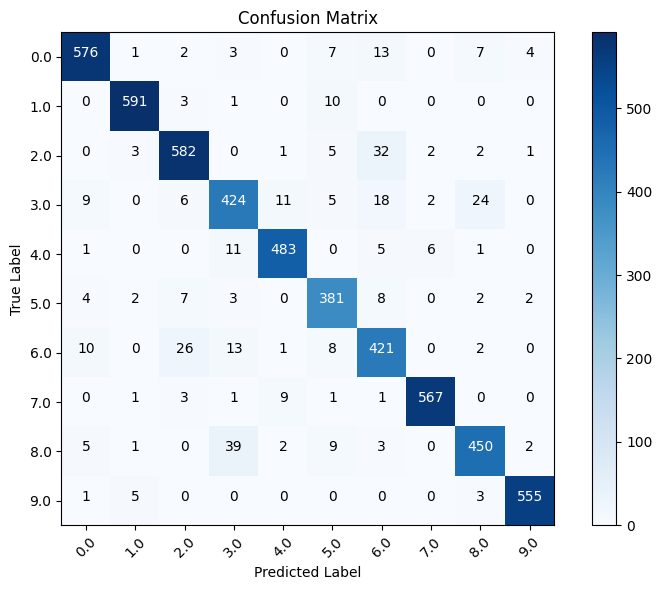

In [8]:
# Creates confusion matrix based on the predictions
cm_best = confusion_matrix(y_test, y_pred_best)

# Plots the confusion matrix
common_functions.plot_confusion_matrix(cm_best, y_test)

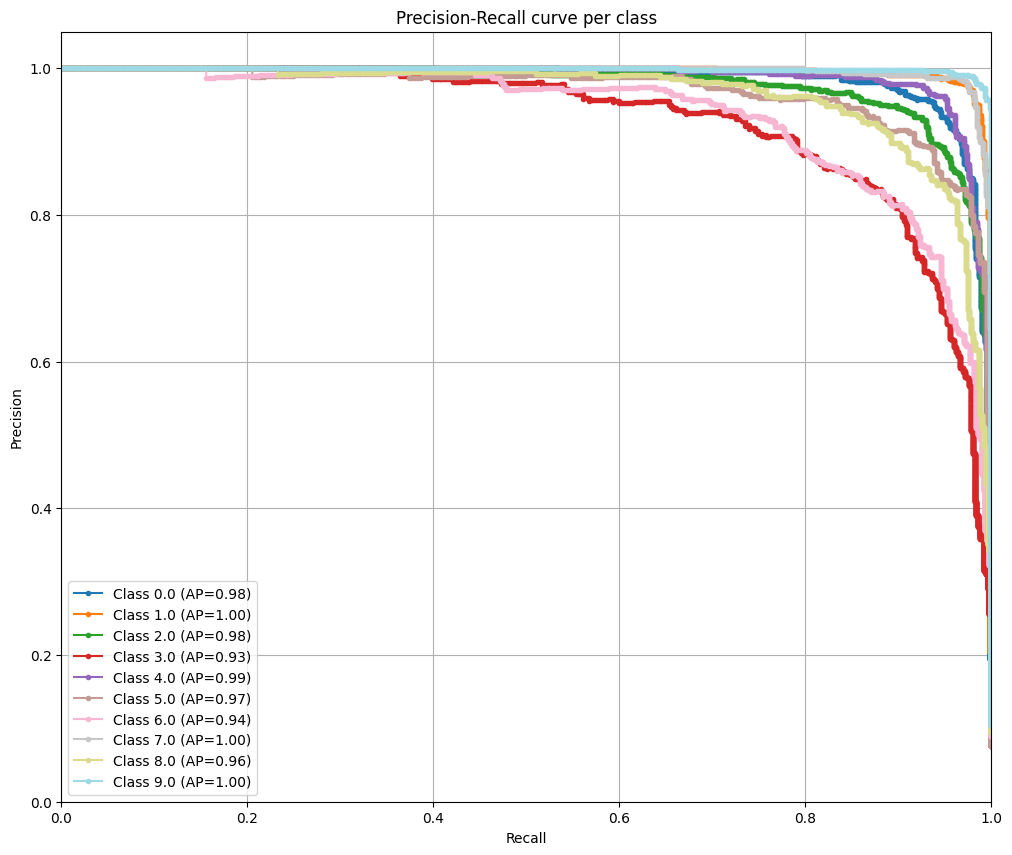

In [9]:
# Generates probability scores to be used for the preicison recall curve
probabilities = mlp_best.predict_proba(x_test_scaled)
# Plots a precision recall curve for all the 10 classes
common_functions.plot_precision_recall_curve_multiclass(y_test, probabilities, np.unique(y_train))